<a href="https://colab.research.google.com/github/IshtdeepSinghSodhi/Parameter-Optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Reading Dataset

In [5]:
dataset = pd.read_csv('/content/card_transdata.csv')
dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


###Pre-Processing of Dataset

In [6]:
dataset.shape

(30002, 8)

In [7]:
dataset.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<Axes: xlabel='fraud', ylabel='count'>

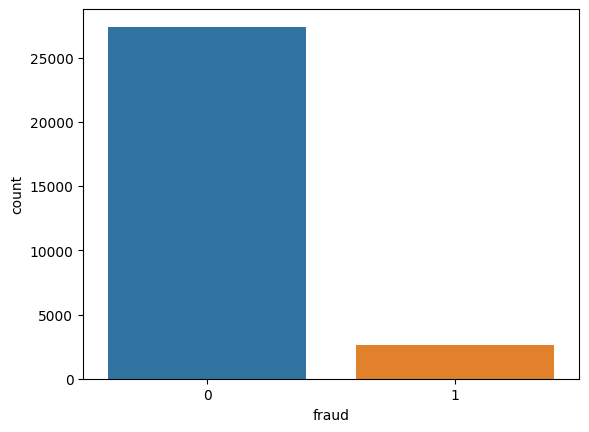

In [8]:
sns.countplot(x = 'fraud', data=dataset)

In [9]:
X = dataset.iloc[:,0:-1]
y = dataset['fraud']

In [10]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.49714628, -0.19252756,  0.05472179, ...,  1.36114461,
        -0.33738015, -1.35696999],
       [-0.26049492, -0.19798872, -0.19157165, ..., -0.7346758 ,
        -0.33738015, -1.35696999],
       [-0.35291133, -0.17262409, -0.51903427, ..., -0.7346758 ,
        -0.33738015,  0.73693597],
       ...,
       [-0.35859652, -0.19629655,  0.90913965, ...,  1.36114461,
        -0.33738015,  0.73693597],
       [-0.30283718,  0.2328972 ,  0.48575568, ..., -0.7346758 ,
        -0.33738015,  0.73693597],
       [-0.39824104, -0.08391385, -0.43751971, ..., -0.7346758 ,
        -0.33738015,  0.73693597]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [11]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [12]:
samples

[(       distance_from_home  distance_from_last_transaction  \
  6465             1.980274                        0.904535   
  15927            1.109931                        5.106421   
  10064           12.473793                        0.085187   
  10075           54.614221                        0.156015   
  6384             8.005562                        0.076664   
  ...                   ...                             ...   
  13123            8.289216                        2.607111   
  19648            4.205637                        0.519097   
  9845            27.960597                       32.428016   
  10799            2.857713                        1.594762   
  2732           140.665238                        0.108630   
  
         ratio_to_median_purchase_price  repeat_retailer  used_chip  \
  6465                         7.739043                1          0   
  15927                       32.611466                0          0   
  10064                     

### Creation of a Fitness Function

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [14]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [15]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.9 Best Kernel =  linear Best Nu =  0.79 Best Epsilon =  3.01
Best Accuracy =  0.94 Best Kernel =  rbf Best Nu =  5.65 Best Epsilon =  8.52
Best Accuracy =  0.96 Best Kernel =  rbf Best Nu =  5.03 Best Epsilon =  0.72
Best Accuracy =  0.91 Best Kernel =  poly Best Nu =  2.25 Best Epsilon =  8.07
Best Accuracy =  0.95 Best Kernel =  rbf Best Nu =  1.89 Best Epsilon =  5.09
Best Accuracy =  0.94 Best Kernel =  rbf Best Nu =  3.01 Best Epsilon =  5.79
Best Accuracy =  0.96 Best Kernel =  rbf Best Nu =  9.7 Best Epsilon =  0.29
Best Accuracy =  0.94 Best Kernel =  rbf Best Nu =  7.27 Best Epsilon =  5.62
Best Accuracy =  0.95 Best Kernel =  rbf Best Nu =  0.42 Best Epsilon =  9.63
Best Accuracy =  0.96 Best Kernel =  rbf Best Nu =  9.35 Best Epsilon =  2.12


###Creation of a Result Table

In [16]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.90,linear,0.79,3.01
1,2,0.94,rbf,5.65,8.52
2,3,0.96,rbf,5.03,0.72
3,4,0.91,poly,2.25,8.07
4,5,0.95,rbf,1.89,5.09
5,6,0.94,rbf,3.01,5.79
6,7,0.96,rbf,9.70,0.29
7,8,0.94,rbf,7.27,5.62
8,9,0.95,rbf,0.42,9.63
9,10,0.96,rbf,9.35,2.12


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Plotting of the Convergence Graph/Linear Curve

In [17]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [18]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [19]:
train_sizes

array([  189,   570,   952,  1334,  1716,  2098,  2480,  2862,  3243,
        3625,  4007,  4389,  4771,  5153,  5535,  5916,  6298,  6680,
        7062,  7444,  7826,  8208,  8589,  8971,  9353,  9735, 10117,
       10499, 10881, 11262, 11644, 12026, 12408, 12790, 13172, 13553,
       13935, 14317, 14699, 15081, 15463, 15845, 16227, 16608, 16990,
       17372, 17754, 18136, 18518, 18900])

In [20]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

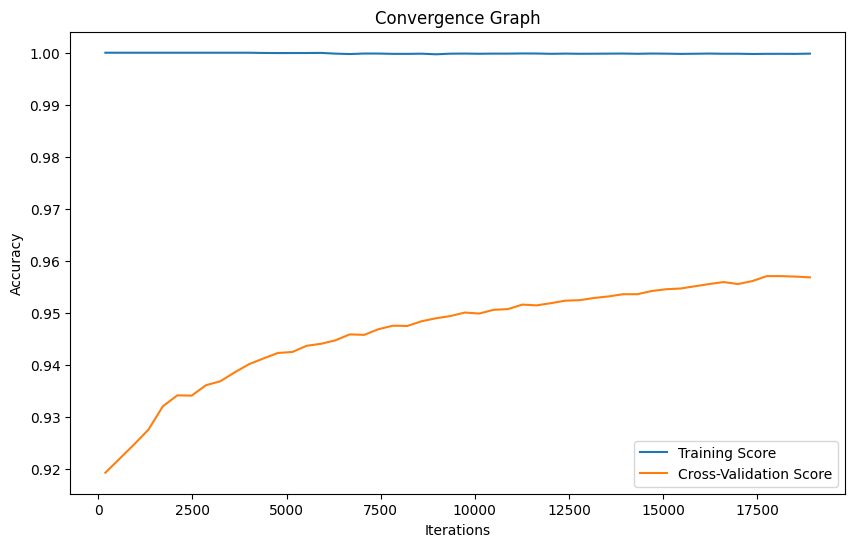

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()